Sometimes we are given a classified data set where they've hidden the feature column names but have given the data and the target classes.

Here, We use KNN to create a model that directly predicts a class for a new data point based on the features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# EDA

Since this data is artificial, lets just do a large pairplot with seaborn.


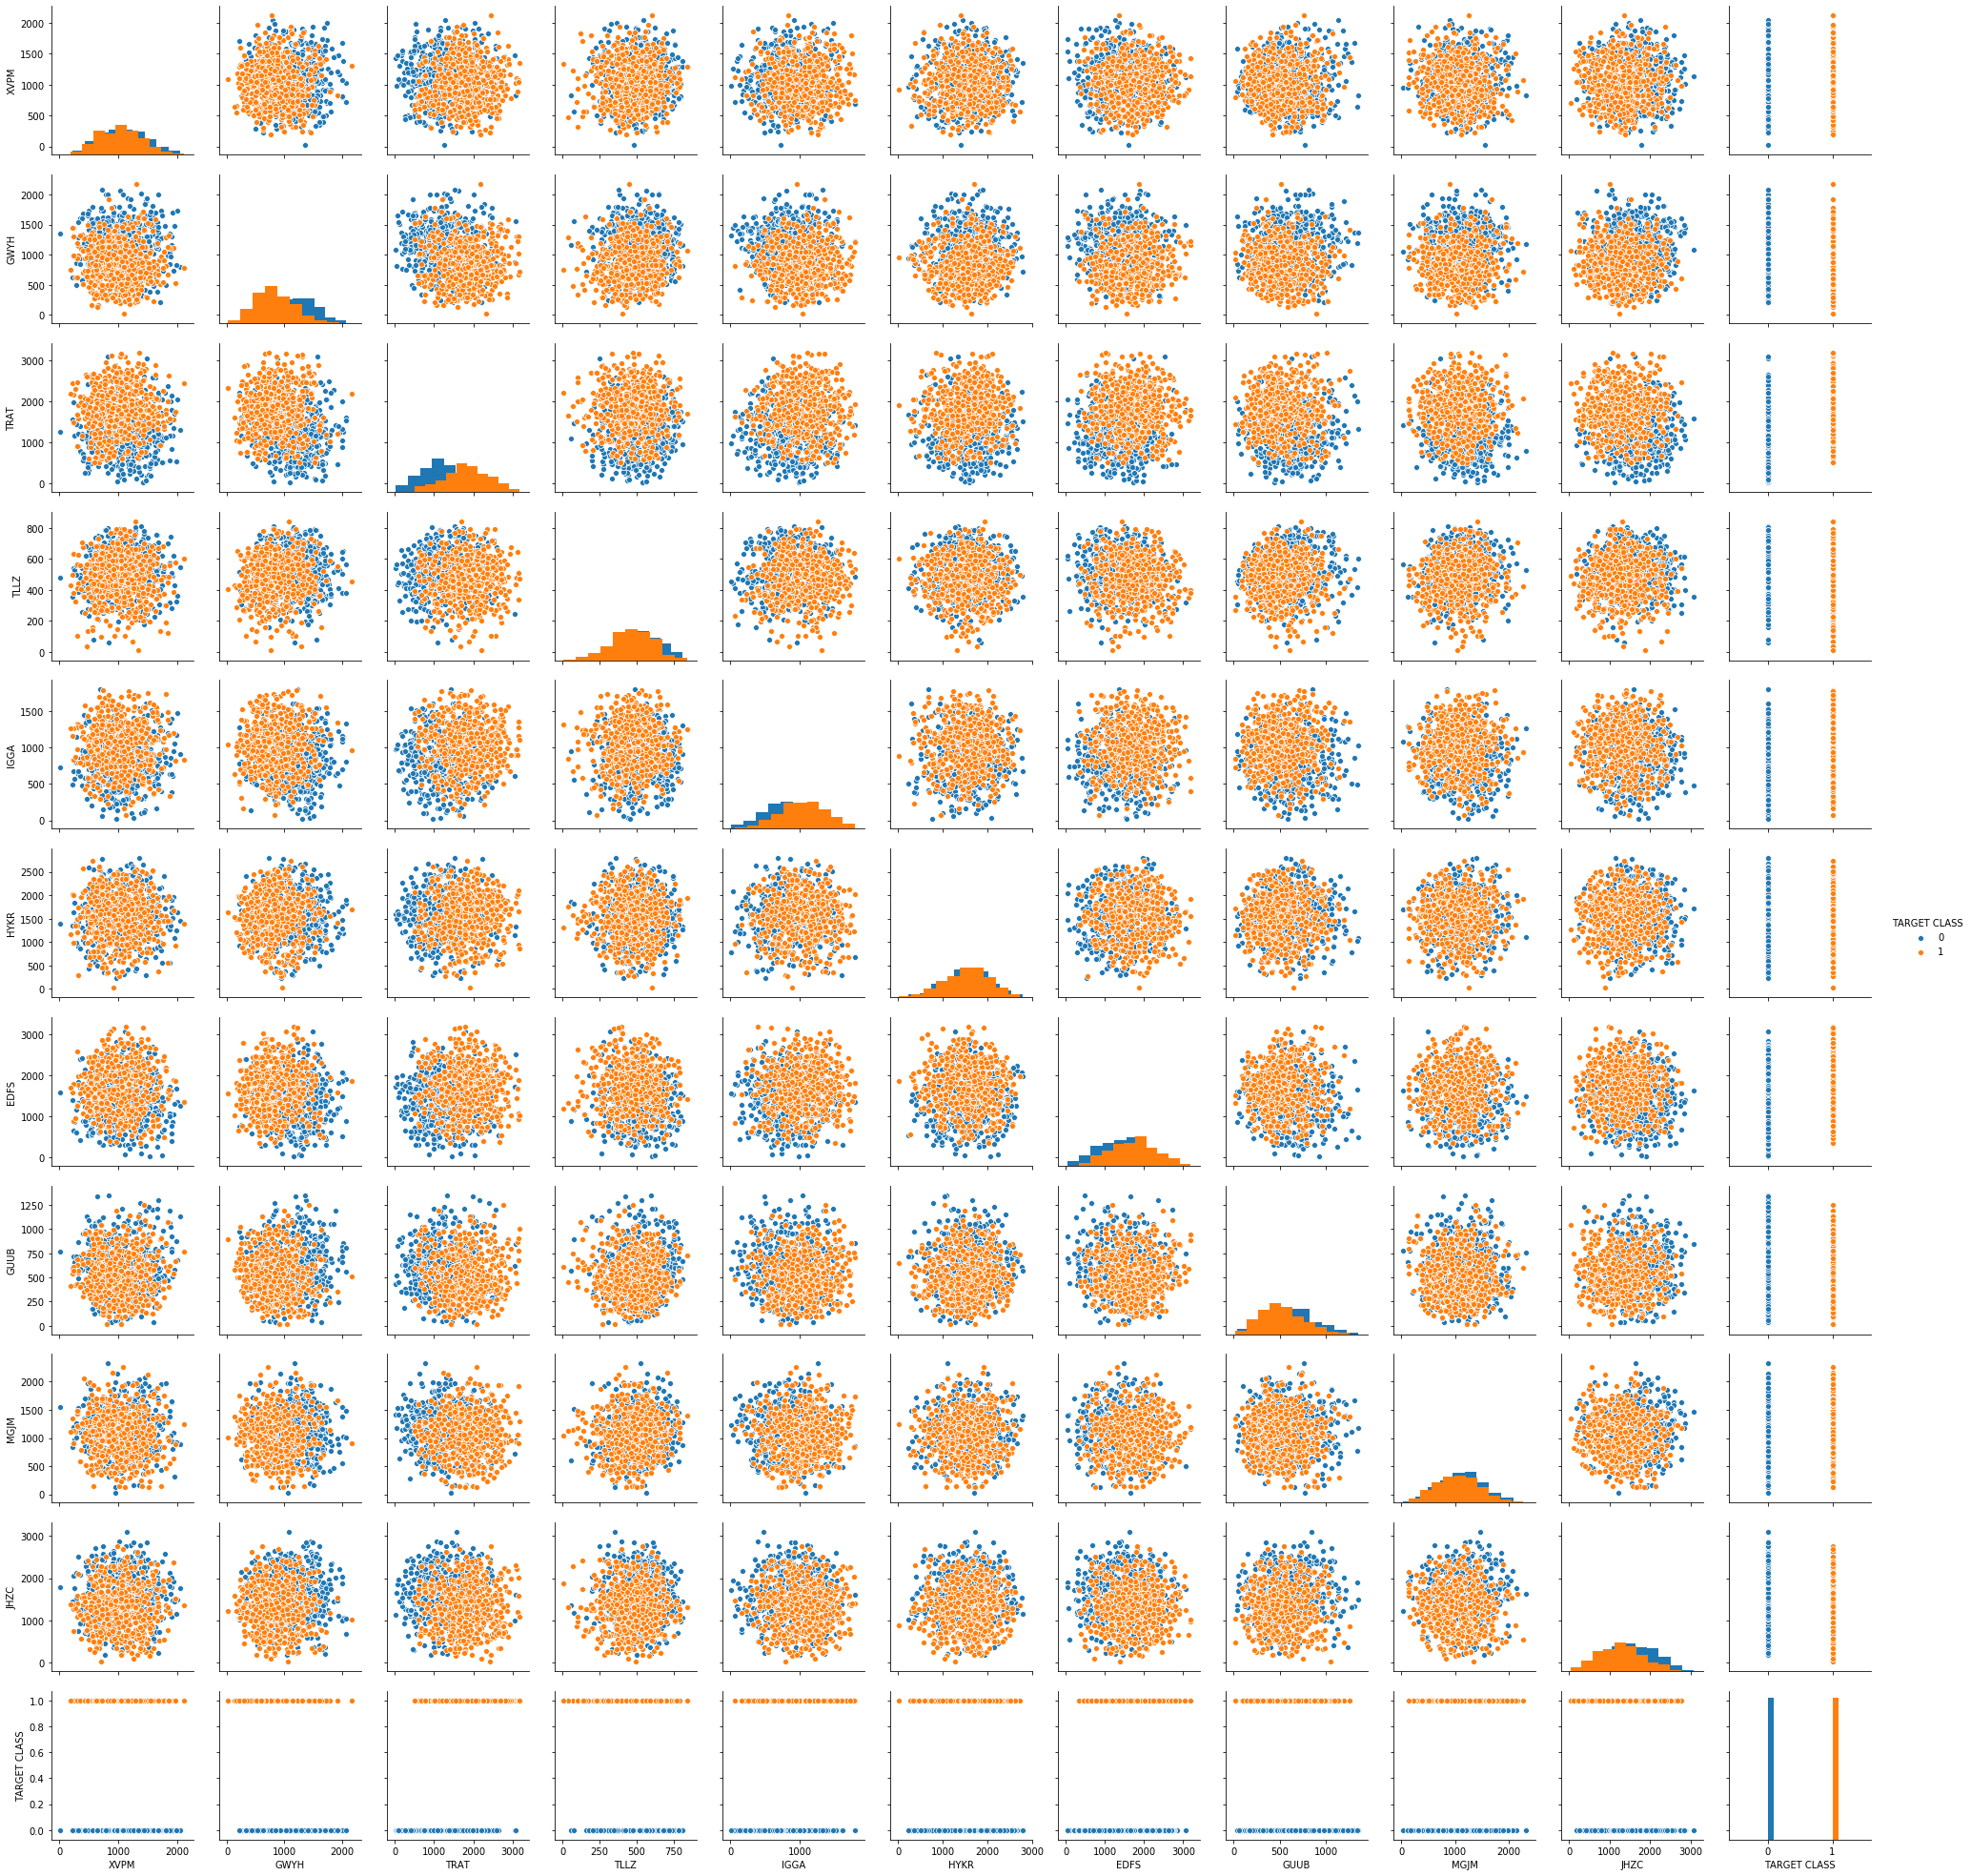

In [5]:
sns.pairplot(df,hue='TARGET CLASS',diag_kind='hist')

# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [11]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat
y= df['TARGET CLASS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations


In [18]:
predictions = knn.predict(X_test)

Create a confusion matrix and classification report.

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,predictions))

[[107  44]
 [ 41 108]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       151
           1       0.71      0.72      0.72       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value

Let's use the elbow method to pick a good K Value!


In [22]:
error_rate = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Create the following plot using the information from the above loop.

Text(0, 0.5, 'Error rate')

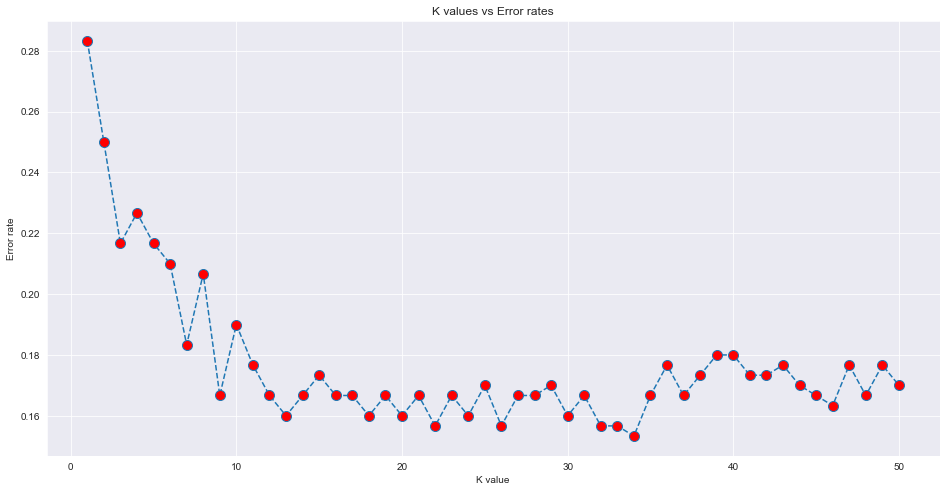

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.plot(range(1,51),error_rate,marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.title('K values vs Error rates')
plt.xlabel('K value')
plt.ylabel('Error rate')

## Retrain with new K Value

Retrain the model with the best K value and re-do the classification report and the confusion matrix.

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


[[107  44]
 [ 41 108]]


              precision    recall  f1-score   support

           0       0.72      0.71      0.72       151
           1       0.71      0.72      0.72       149

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [25]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K = 21 \n")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K = 21 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.82      0.86      0.84       149

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[122  29]
 [ 21 128]]


In [26]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K = 17 \n")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K = 17 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       151
           1       0.81      0.87      0.84       149

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[121  30]
 [ 20 129]]


In [27]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K = 30 \n")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K = 30 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       151
           1       0.83      0.85      0.84       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[125  26]
 [ 22 127]]


In [28]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K = 13 \n")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K = 13 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       151
           1       0.82      0.87      0.84       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[122  29]
 [ 19 130]]


In [29]:
# NOW WITH K=34
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("WITH K = 34 \n")
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

WITH K = 34 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       151
           1       0.83      0.87      0.85       149

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

[[124  27]
 [ 19 130]]
